## Quality control (supplementary figures)
- Compare replicate to replicate
- RNA vs RNA
- Replicate enhancer activity (RNA/DNA)
- Compare DNA vs RNA counts

In [1]:
#import libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
os.chdir('..\data')
fig_out = r'..\figures'
import time
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size': 10},
			  font='arial')

In [9]:
#make useful plotting functions
#specify colors
act_cols = {'Activating': sns.color_palette('RdYlBu')[-1], 'Repressing':sns.color_palette('RdYlBu')[0], 'Unchanged':sns.color_palette('RdGy')[4], 'different':sns.color_palette('Set2')[1]}

def plot_jointplot(data, x_col, y_col, hue = None, hue_ord = None, pal = None, col = None, xlims = (0.001,4500), ylims = (0.001,4500), units = 'CPM', xy_labels = [''], title = None, hue_title = None, pcc = False, savefig = False, fig_name = None):
	#ensure there's no 0s
	non_zero_data = data[(data[x_col] > 0) & (data[y_col] > 0)].copy()
	g=sns.jointplot(data = non_zero_data, x=x_col, y=y_col, hue=hue, hue_order=hue_ord, palette=pal, s=15, color= col, joint_kws=dict(alpha = 0.5), ylim=ylims, xlim=xlims, height=5, marginal_kws=dict(log_scale=True), marginal_ticks=True)
	if xy_labels == ['']:
		g.set_axis_labels('Replicate 1 (' + units + ')', 'Replicate 2 (' + units + ')', fontsize=10)
	else:
		g.set_axis_labels(xy_labels[0] + ' (' + units + ')', xy_labels[1] + ' (' + units + ')', fontsize=10)
	#add pearsons correlation
	if pcc == True: 
		r,p = stats.pearsonr(data[x_col], data[y_col])
		g.ax_joint.annotate(f'PCC = {r:.3f}',xy=(0.7, 0.05), xycoords='axes fraction',
							ha='left', va='center',
							bbox={'boxstyle': 'round', 'fc': 'lavender', 'ec': 'black'})
	if title != None: g.ax_joint.set_title(title, y=0.9, fontsize = 12)
	if hue_title != None: sns.move_legend(g.ax_joint, loc='upper left', bbox_to_anchor=(0.01, 0.9), title = hue_title, frameon=False)
	if savefig == True:
		if fig_name == None: 
			g.savefig(os.path.join(fig_out,'fig_' + time.strftime("%Y%m%d-%H%M%S")), dpi=300, transparent=True, bbox_inches='tight')
		else: 
			g.savefig(os.path.join(fig_out,fig_name), dpi=300, transparent=True, bbox_inches='tight')
	del(g)

#for read distribution. Histogram
def plot_distro(a, tbl, count_col1, count_col2, x_ax_lims, y_ax_lims, cell):
	sns.histplot(tbl[[count_col1, count_col2]],ax=a).set(xlim=(0,x_ax_lims), ylim=(0,y_ax_lims), ylabel='Number of mapped fragments',xlabel='Read count per mapped fragment', title='Read distribution from ' + cell, xmargin=0.5)
	med1 = int(tbl[count_col1].median())
	med2 = int(tbl[count_col2].median())
	l1 = a.axvline(med1, c='cornflowerblue', ls='--', lw=0.9)
	l2 = a.axvline(med2, c='orange', ls='--', lw=0.9)
	a.legend(a.get_legend().legend_handles + [l1,l2],['Count (' + cell + ' 1)', 'Count (' + cell + ' 2)', 'Median (' + cell + ' 1) = ' + str(med1), 'Median (' + cell + ' 2) = ' + str(med2)],frameon = False)
	sns.move_legend(a, "upper left", bbox_to_anchor=(0.1,1))
	a.minorticks_on()
	a.xaxis.set_tick_params(which='minor', bottom=True)

def plot_distro_sngl(a, tbl, count_col1, x_ax_lims, y_ax_lims, cell):
	sns.histplot(tbl[count_col1],ax=a).set(xlim=(0,x_ax_lims), ylim=(0,y_ax_lims), ylabel='Number of mapped fragments',xlabel='Read count per mapped fragment', title='Read distribution from ' + cell, xmargin=0.5)
	med1 = int(tbl[count_col1].median())
	l1 = a.axvline(med1, c='cornflowerblue', ls='--', lw=0.9)
	a.legend([l1],['Median (' + cell + ' 1) = ' + str(med1)],frameon = False)
	a.minorticks_on()
	a.xaxis.set_tick_params(which='minor', bottom=True)

# Figure S1
## Assess sequencing depth

In [3]:
counts = pd.read_csv('p63enh_starrseq_raw_counts.csv', index_col=0)
counts

,seq,id,loc,enhancer_variant,HaCaT_1_count,HaCaT_2_count,MCF10AGus_count,MCF10Ap53KO_1_count,MCF10Ap53KO_2_count,MCF10ATAp63B_count,MCF10A_1_count,MCF10A_2_count,plasmid_1_count,plasmid_2_count,SCC25_2_count,SCC25_4_count
0,AGAATCTGTTGCAACAGATTCACCCACGCTGGTTAACGGTATTTGC...,chr1_3717092_3717116_WT,chr1_3717092_3717116,WT,1319,1335,976,1409,1144,2735,3592,2304,4657,1656,766,1789
1,CTCCTGGAGCGCCCAAGCCTCCGGGTCCTGTACTCACAGAGGCAGG...,chr1_5652400_5652424_WT,chr1_5652400_5652424,WT,421,308,490,635,1094,1382,1425,1114,953,395,722,435
2,CTCTTCCCCTCTCCCACCCGCAAGGGTGAGCACTGGCCTCGGCATT...,chr1_23167597_23167616_WT,chr1_23167597_23167616,WT,372,402,766,1397,812,1920,2044,2283,1310,409,1335,1964
3,AAAAGGTGACGGCAGACCTGGCGGGACAGAAGCCCCATTGTTTGGG...,chr1_31575754_31575773_WT,chr1_31575754_31575773,WT,607,574,849,1470,2091,538,2844,2419,1853,740,1381,1021
4,GCCAACAGATGCAGACTCGCTCTGCCTACCTGTGGAGGCCGGTGAG...,chr1_38027284_38027308_WT,chr1_38027284_38027308,WT,657,615,512,1163,1102,1257,1545,1290,1219,444,851,941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86545,CGAAGCGAGGGCTCCTGTTAACGTGACAGGACTTTCGTCGGGTTCT...,chr9_135951083_135951107_fullShuffle,chr9_135951083_135951107,fullShuffle,1184,1208,1120,1876,1758,879,4376,3491,4699,1790,2878,2358
86546,ACTGGACTCGGCCGAGCATCGTACAGCCGTTTAGGGCCCTATCATG...,chr9_136484776_136484795_fullShuffle,chr9_136484776_136484795,fullShuffle,0,43,0,127,2,83,413,28,112,26,0,0
86547,ACCAGCGTCTGATGCGCCTATAGGCGTGAGTGGCCGGTGAATAAAC...,chr9_136533879_136533893_fullShuffle,chr9_136533879_136533893,fullShuffle,2147,1697,1448,3413,3530,2360,5537,5166,5529,1922,3445,2924
86548,TCAGGGTAGGCCGCGTAAAGCCCCATCAAGCGTGCATGGTGACAGC...,chr9_137062571_137062595_fullShuffle,chr9_137062571_137062595,fullShuffle,3633,3024,4641,8350,7900,3655,9653,11375,10849,3902,6527,7899


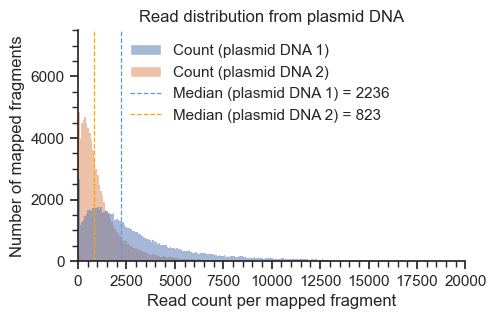

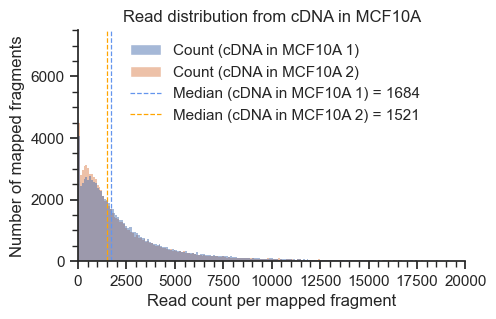

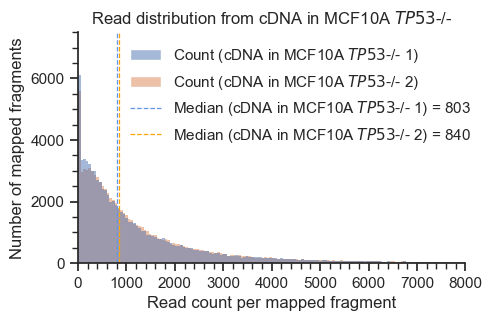

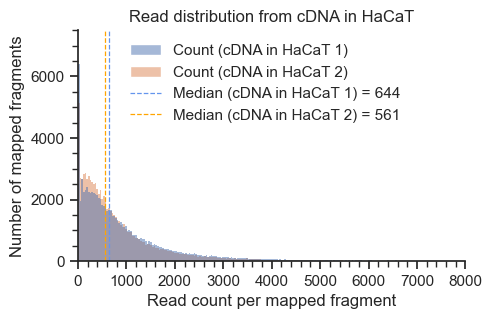

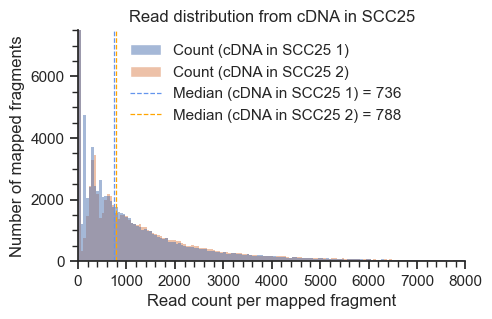

In [10]:
fig_out_path = os.path.abspath(r'..\figures')
fig, ax = plt.subplots(figsize=(5,3))
plot_distro(ax, counts, 'plasmid_1_count','plasmid_2_count', 20000, 7500, 'plasmid DNA')
fig.savefig(os.path.join(fig_out_path,'S1A.png'), dpi=300, transparent=False, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,3))
plot_distro(ax, counts, 'MCF10A_1_count','MCF10A_2_count', 20000, 7500, 'cDNA in MCF10A')
fig.savefig(os.path.join(fig_out_path,'S1B.png'), dpi=300, transparent=False, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,3))
plot_distro(ax, counts, 'MCF10Ap53KO_1_count','MCF10Ap53KO_2_count', 8000, 7500, 'cDNA in MCF10A $\it{TP53}$-/-')
fig.savefig(os.path.join(fig_out_path,'S1C.png'), dpi=300, transparent=False, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,3))
plot_distro(ax, counts, 'HaCaT_1_count','HaCaT_2_count', 8000, 7500, 'cDNA in HaCaT')
fig.savefig(os.path.join(fig_out_path,'S1D.png'), dpi=300, transparent=False, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,3))
plot_distro(ax, counts, 'SCC25_2_count','SCC25_4_count', 8000, 7500, 'cDNA in SCC25')
fig.savefig(os.path.join(fig_out_path,'S1E.png'), dpi=300, transparent=False, bbox_inches='tight')

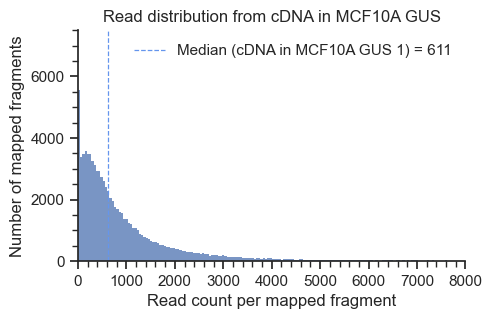

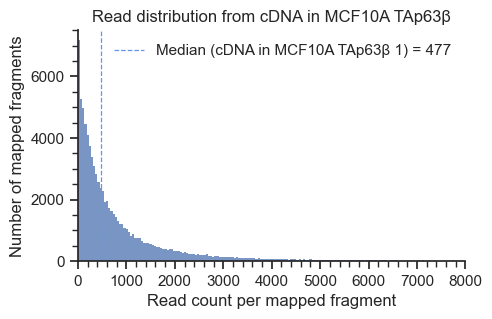

In [6]:
fig, ax = plt.subplots(figsize=(5,3))
plot_distro_sngl(ax, counts, 'MCF10AGus_count',8000, 7500, 'cDNA in MCF10A GUS')
fig.savefig(os.path.join(fig_out_path,'S1F.png'), dpi=300, transparent=True, bbox_inches='tight')
fig, ax = plt.subplots(figsize=(5,3))
plot_distro_sngl(ax, counts, 'MCF10ATAp63B_count',8000, 7500, 'cDNA in MCF10A TAp63β')
fig.savefig(os.path.join(fig_out_path,'S1G.png'), dpi=300, transparent=True, bbox_inches='tight')

# Table S2
## Numbers related to library coverage: 

In [7]:
total_variants = 86550
total_reads = {'plasmid_1' : 568218578, 'plasmid_2' : 198333253,
'MCF10A_1': 523350209, 'MCF10A_2': 481238408,
'MCF10Ap53KO_1' : 254879810, 'MCF10Ap53KO_2' : 254375594,
'HaCaT_1' : 164984876, 'HaCaT_2' : 141431542,
'SCC25_2' : 226244212, 'SCC25_4' : 223720206,
'MCF10AGus' : 213017923, 'MCF10ATAp63B' : 187023432}

numbers = pd.DataFrame.from_dict(data={'Library': list(total_reads.keys()), 'Total Reads' : list(total_reads.values()) })
numbers['Total Mapped Reads'] = numbers.Library.apply(lambda x: counts[x + '_count'].sum())
numbers['Expected coverage/fragment'] = round(numbers['Total Reads'] / total_variants, ndigits=1)
numbers['Observed mean coverage/fragment'] = round(numbers['Total Mapped Reads'] / total_variants, ndigits=1)
numbers['Observed median coverage/fragment'] = numbers.Library.apply(lambda x: int(counts[x + '_count'].median()))
#add IQRs
numbers['25% Quantile'] = numbers.Library.apply(lambda x: int(counts[x + '_count'].quantile(0.25)))
numbers['75% Quantile'] = numbers.Library.apply(lambda x: int(counts[x + '_count'].quantile(0.75)))
numbers['Max count'] = numbers.Library.apply(lambda x: counts[x + '_count'].max())
numbers['Min count'] = numbers.Library.apply(lambda x: counts[x + '_count'].min())
numbers.to_csv('Expected vs observed counts.csv', index=False)
numbers

,Library,Total Reads,Total Mapped Reads,Expected coverage/fragment,Observed mean coverage/fragment,Observed median coverage/fragment,25% Quantile,75% Quantile,Max count,Min count
0,plasmid_1,568218578,302329951,6565.2,3493.1,2236,1074,4289,629838,0
1,plasmid_2,198333253,111867614,2291.5,1292.5,823,392,1590,247551,0
2,MCF10A_1,523350209,278394496,6046.8,3216.6,1684,742,3499,887833,0
3,MCF10A_2,481238408,262171041,5560.2,3029.1,1521,655,3277,865663,0
4,MCF10Ap53KO_1,254879810,140692149,2944.9,1625.6,803,312,1822,642083,0
5,MCF10Ap53KO_2,254375594,140150197,2939.1,1619.3,840,342,1847,622360,0
6,HaCaT_1,164984876,91476636,1906.2,1056.9,644,265,1314,309532,0
7,HaCaT_2,141431542,79829126,1634.1,922.3,561,242,1133,260527,0
8,SCC25_2,226244212,124696110,2614.0,1440.7,736,246,1707,494708,0
9,SCC25_4,223720206,125474936,2584.9,1449.7,788,254,1825,474026,0


# Figure S2.
## Compare replicate to replicate

In [3]:
os.chdir('..\data')
df = pd.read_csv('p63enh_starrseq_norm_counts_unfiltered.csv', index_col=0)
plasmids = df[['loc','id','enhancer_variant','CPM_plasmid_1','CPM_plasmid_2']].copy()
mcf = df[['loc','id','enhancer_variant','CPM_RNA_MCF10A_1','CPM_RNA_MCF10A_2',
		  'RNA/DNA_MCF10A_1', 'RNA/DNA_MCF10A_2', 'mean_RNA/DNA_MCF10A','CPM_plasmid_1']].copy()
pko = df[['loc','id','enhancer_variant','CPM_RNA_MCF10Ap53KO_1','CPM_RNA_MCF10Ap53KO_2',
		  'RNA/DNA_MCF10Ap53KO_1', 'RNA/DNA_MCF10Ap53KO_2', 'mean_RNA/DNA_MCF10Ap53KO','CPM_plasmid_1']].copy()
hac = df[['loc','id','enhancer_variant','CPM_RNA_HaCaT_1','CPM_RNA_HaCaT_2',
		  'RNA/DNA_HaCaT_1', 'RNA/DNA_HaCaT_2', 'mean_RNA/DNA_HaCaT','CPM_plasmid_2']].copy()
scc = df[['loc','id','enhancer_variant','CPM_RNA_SCC25_4','CPM_RNA_SCC25_2',
		  'RNA/DNA_SCC25_4', 'RNA/DNA_SCC25_2', 'mean_RNA/DNA_SCC25','CPM_plasmid_1']].copy()
tap63 = df[['loc','id','enhancer_variant','CPM_RNA_MCF10ATAp63B',
			'RNA/DNA_MCF10ATAp63B','CPM_plasmid_1']].copy()
gus = df[['loc','id','enhancer_variant','CPM_RNA_MCF10AGus',
			'RNA/DNA_MCF10AGus','CPM_plasmid_1']].copy()
del(df)

## All data with CPM > 0

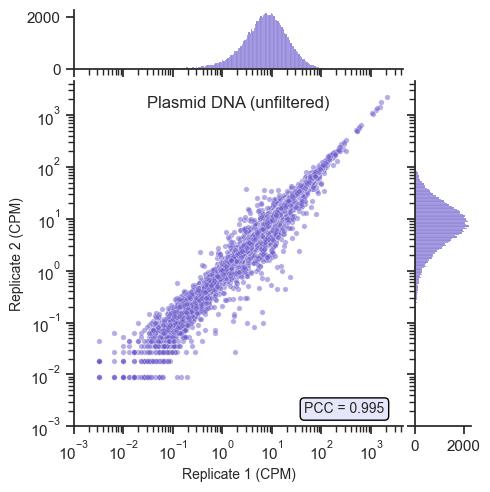

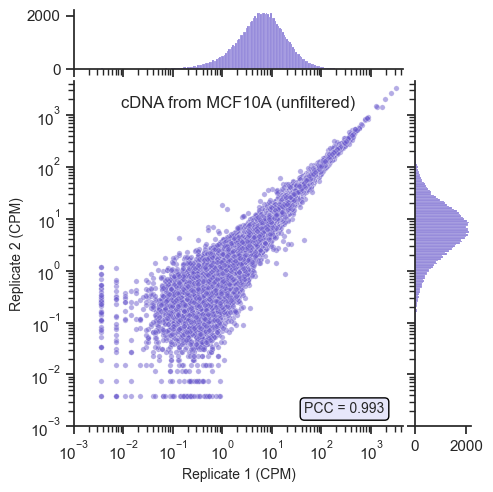

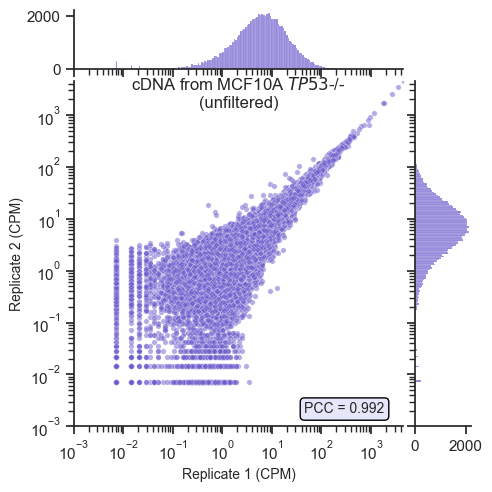

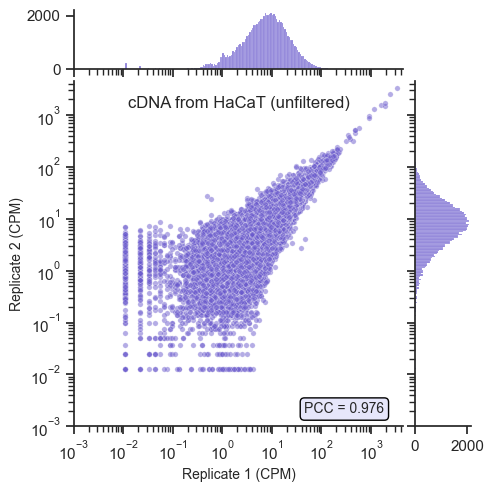

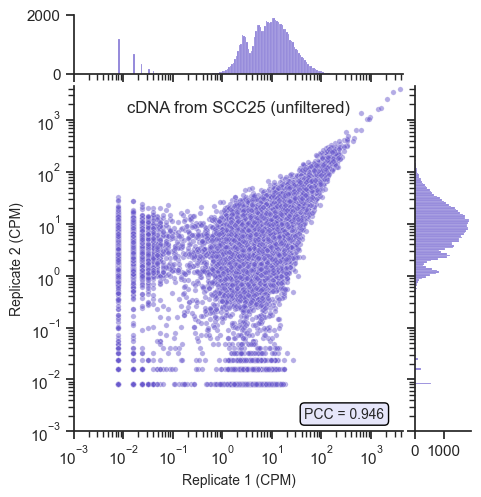

In [7]:
os.chdir(r'..\figures')
#CPM values, replicate vs replicate
plot_jointplot(data = plasmids, y_col='CPM_plasmid_2',x_col='CPM_plasmid_1', col = 'slateblue', title = 'Plasmid DNA (unfiltered)', pcc = True,  savefig = True, fig_name = 'S2A.png')
plot_jointplot(data = mcf, y_col='CPM_RNA_MCF10A_2',x_col='CPM_RNA_MCF10A_1', col = 'slateblue', title = 'cDNA from MCF10A (unfiltered)', pcc = True, savefig = True, fig_name = 'S2C.png')
plot_jointplot(data = pko, y_col='CPM_RNA_MCF10Ap53KO_2',x_col='CPM_RNA_MCF10Ap53KO_1', col = 'slateblue', title = 'cDNA from MCF10A $\it{TP53}$-/-\n(unfiltered)', pcc = True, savefig = True, fig_name = 'S2G.png')
plot_jointplot(data = hac, y_col='CPM_RNA_HaCaT_2',x_col='CPM_RNA_HaCaT_1', col = 'slateblue', title = 'cDNA from HaCaT (unfiltered)', pcc = True, savefig = True, fig_name = 'S2K.png')
plot_jointplot(data = scc, y_col='CPM_RNA_SCC25_2',x_col='CPM_RNA_SCC25_4', col = 'slateblue', title = 'cDNA from SCC25 (unfiltered)', pcc = True, savefig = True, fig_name = 'S2O.png')

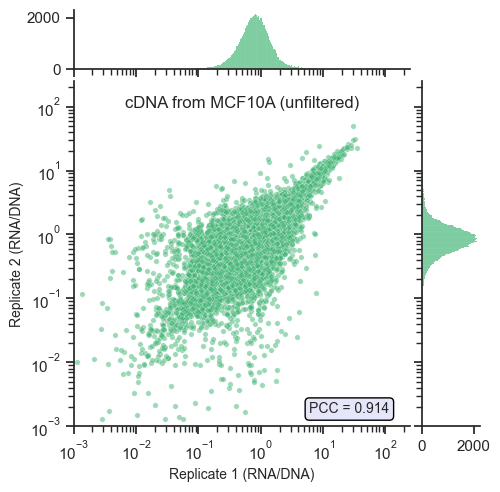

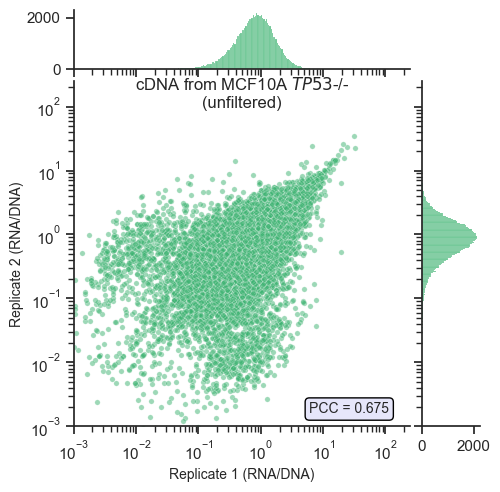

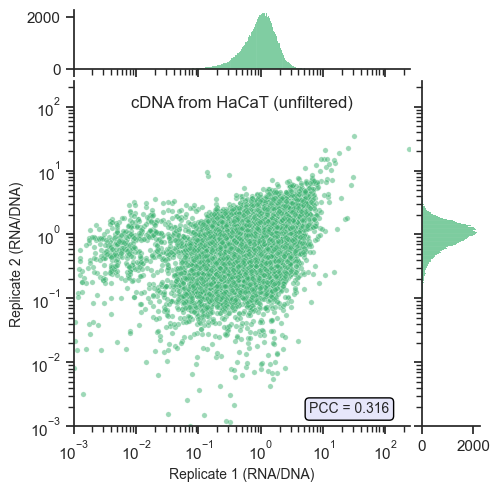

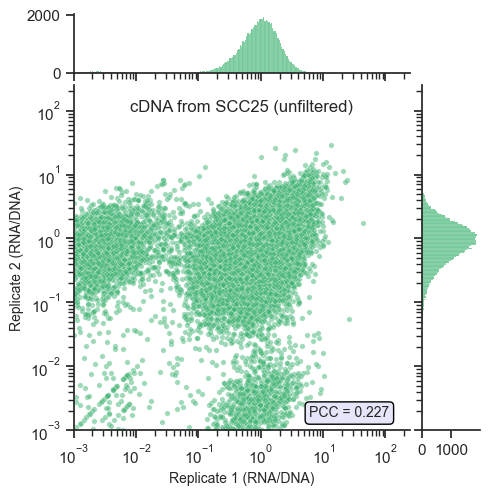

In [8]:
os.chdir(r'..\figures')
#RNA/DNA values, replicate vs replicate
plot_jointplot(data = mcf, y_col='RNA/DNA_MCF10A_1', x_col='RNA/DNA_MCF10A_2', col = 'mediumseagreen', title = 'cDNA from MCF10A (unfiltered)', 
			   units = 'RNA/DNA', xlims=(0.001,250), ylims=(0.001,250), pcc = True, savefig = True, fig_name = 'S2E.png')
plot_jointplot(data = pko, y_col='RNA/DNA_MCF10Ap53KO_2', x_col='RNA/DNA_MCF10Ap53KO_1', col = 'mediumseagreen', title = 'cDNA from MCF10A $\it{TP53}$-/-\n(unfiltered)', 
			   units = 'RNA/DNA', xlims=(0.001,250), ylims=(0.001,250), pcc = True, savefig = True, fig_name = 'S2I.png')
plot_jointplot(data = hac, y_col='RNA/DNA_HaCaT_2',x_col='RNA/DNA_HaCaT_1', col = 'mediumseagreen', title = 'cDNA from HaCaT (unfiltered)', 
			   units = 'RNA/DNA', xlims=(0.001,250), ylims=(0.001,250), pcc = True, savefig = True, fig_name = 'S2M.png')
plot_jointplot(data = scc, y_col='RNA/DNA_SCC25_2',x_col='RNA/DNA_SCC25_4', col = 'mediumseagreen', title = 'cDNA from SCC25 (unfiltered)', 
			   units = 'RNA/DNA', xlims=(0.001,250), ylims=(0.001,250), pcc = True, savefig = True, fig_name = 'S2R.png')

## CPM filter and matched for variants
- DNA CPM > 2, cDNA CPM > 0.1
- MCF10A WT and p53KO are matched for all 5 varinats
- HaCaT and SCC25 are matched for WT and mut enhancer variants

In [5]:
os.chdir('..\data')
mcfpko = list(set(pd.read_csv('p63enh_starrseq_log2fc_matched_MCF10A_WTp53KO_5variants.csv', usecols=['loc'])['loc'].tolist()))
mcfhacscc = list(set(pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10Ap53KO_HaCaT_SCC25_WTmut.csv', usecols=['loc'])['loc'].tolist()))
gustap63 = list(set(pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10A_GUSTAp63B_WTmut.csv', usecols=['loc'])['loc'].tolist()))
#use raw counts tables
#but keep only those that are matched for varinats and meet CPM cutoff
filt_plas = plasmids[plasmids['loc'].isin(mcfpko)]
filt_mfc = mcf[mcf['loc'].isin(mcfpko)]
filt_pko = pko[pko['loc'].isin(mcfpko)]
filt_hac = hac[(hac['loc'].isin(mcfhacscc)) & (hac.enhancer_variant.isin(['WT', 'mut']))]
filt_scc = scc[(scc['loc'].isin(mcfhacscc)) & (scc.enhancer_variant.isin(['WT', 'mut']))]
filt_tap63 = tap63[(tap63['loc'].isin(gustap63)) & (tap63.enhancer_variant.isin(['WT', 'mut']))]
filt_gus = gus[(gus['loc'].isin(gustap63)) & (gus.enhancer_variant.isin(['WT', 'mut']))]

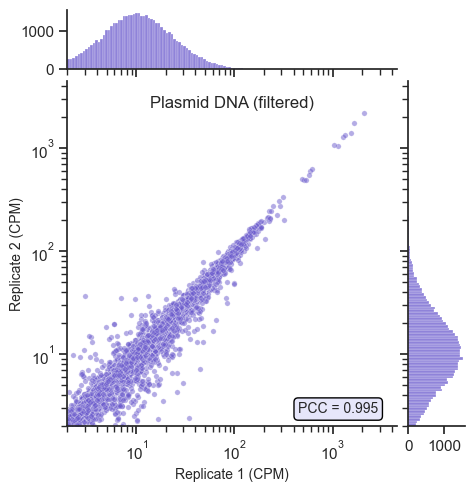

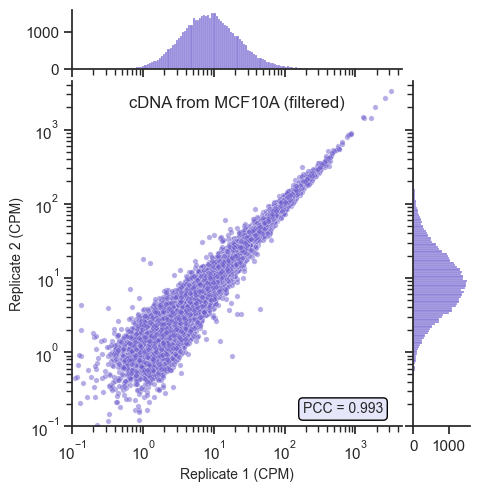

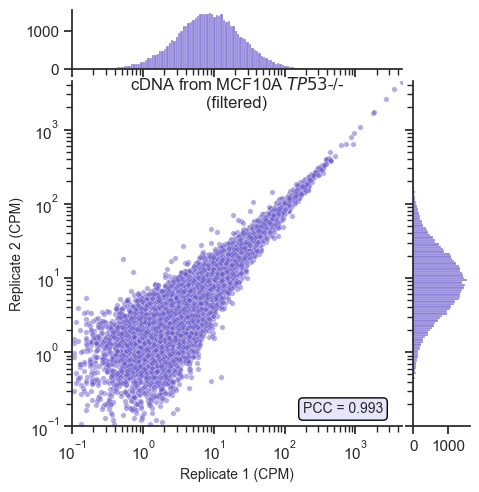

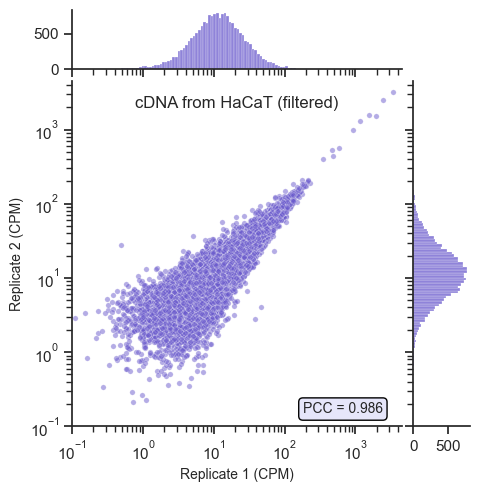

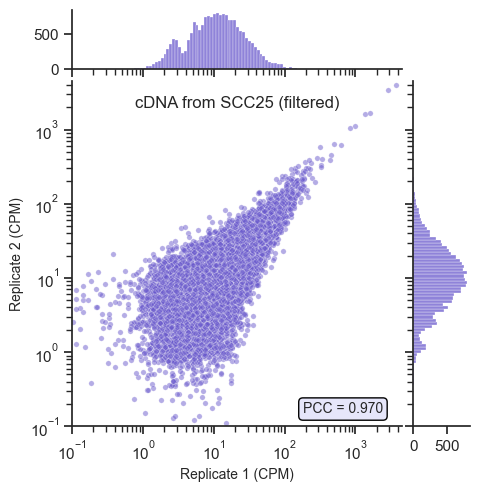

In [10]:
os.chdir(r'..\figures')
#CPM values, replicate vs replicate, filtered
plot_jointplot(data = filt_plas, y_col='CPM_plasmid_2',x_col='CPM_plasmid_1', title = 'Plasmid DNA (filtered)', 
			   col = 'slateblue', pcc = True, xlims=(2,4500), ylims=(2,4500), savefig = False, fig_name = 'S2B.png')
plot_jointplot(data = filt_mfc, y_col='CPM_RNA_MCF10A_2',x_col='CPM_RNA_MCF10A_1', title = 'cDNA from MCF10A (filtered)', 
			   col = 'slateblue', pcc = True, xlims=(0.1,4500), ylims=(0.1,4500), savefig = False, fig_name = 'S2D.png')
plot_jointplot(data = filt_pko, y_col='CPM_RNA_MCF10Ap53KO_2',x_col='CPM_RNA_MCF10Ap53KO_1', title = 'cDNA from MCF10A $\it{TP53}$-/-\n(filtered)', 
			   col = 'slateblue', pcc = True, xlims=(0.1,4500), ylims=(0.1,4500), savefig = False, fig_name = 'S2H.png')
plot_jointplot(data = filt_hac, y_col='CPM_RNA_HaCaT_2',x_col='CPM_RNA_HaCaT_1', title = 'cDNA from HaCaT (filtered)', 
			   col = 'slateblue', pcc = True, xlims=(0.1,4500), ylims=(0.1,4500), savefig = False, fig_name = 'S2L.png')
plot_jointplot(data = filt_scc, y_col='CPM_RNA_SCC25_2',x_col='CPM_RNA_SCC25_4', title = 'cDNA from SCC25 (filtered)', 
			   col = 'slateblue', pcc = True, xlims=(0.1,4500), ylims=(0.1,4500), savefig = False, fig_name = 'S2P.png')

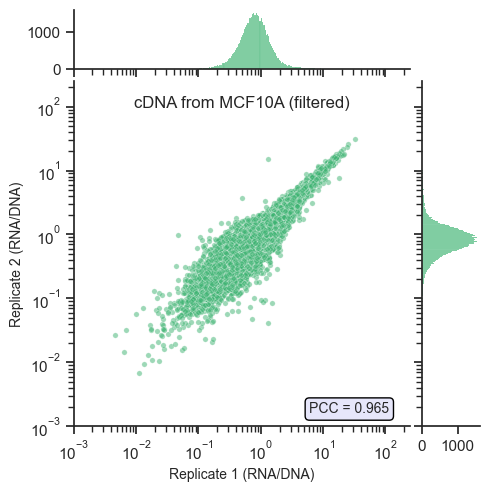

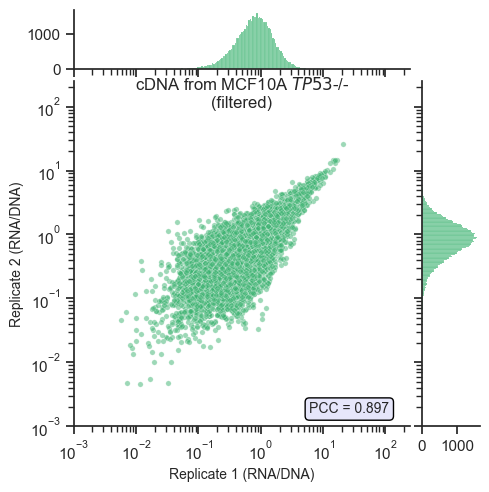

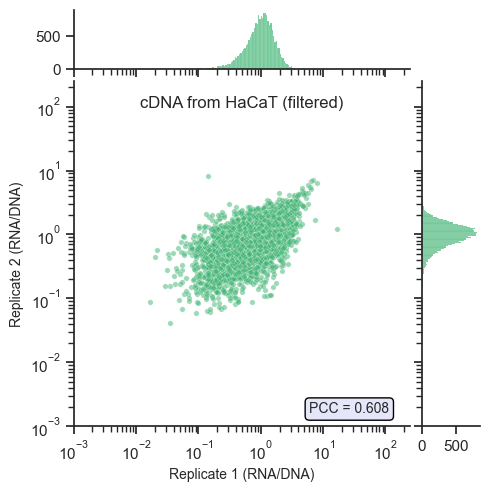

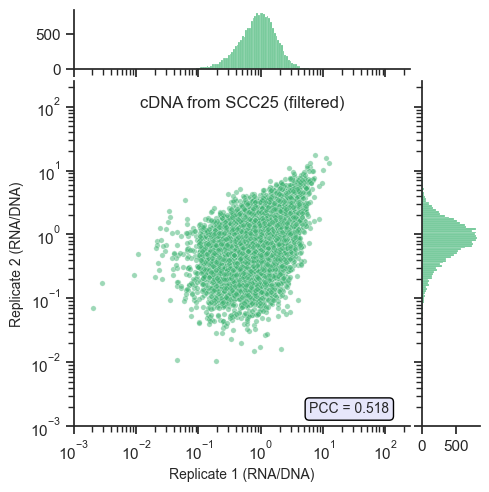

In [7]:
os.chdir(r'..\figures')
#RNA/DNA values, replicate vs replicate
plot_jointplot(data = filt_mfc, y_col='RNA/DNA_MCF10A_1', x_col='RNA/DNA_MCF10A_2', col = 'mediumseagreen', title = 'cDNA from MCF10A (filtered)', 
			   units = 'RNA/DNA', xlims=(0.001,250), ylims=(0.001,250), pcc = True, savefig = True, fig_name = 'S2F.png')
plot_jointplot(data = filt_pko, y_col='RNA/DNA_MCF10Ap53KO_2', x_col='RNA/DNA_MCF10Ap53KO_1', col = 'mediumseagreen', title = 'cDNA from MCF10A $\it{TP53}$-/-\n(filtered)', 
			   units = 'RNA/DNA', xlims=(0.001,250), ylims=(0.001,250), pcc = True, savefig = True, fig_name = 'S2J.png')
plot_jointplot(data = filt_hac, y_col='RNA/DNA_HaCaT_2',x_col='RNA/DNA_HaCaT_1', col = 'mediumseagreen', title = 'cDNA from HaCaT (filtered)', 
			   units = 'RNA/DNA', xlims=(0.001,250), ylims=(0.001,250), pcc = True, savefig = True, fig_name = 'S2N.png')
plot_jointplot(data = filt_scc, y_col='RNA/DNA_SCC25_2',x_col='RNA/DNA_SCC25_4', col = 'mediumseagreen', title = 'cDNA from SCC25 (filtered)', 
			   units = 'RNA/DNA', xlims=(0.001,250), ylims=(0.001,250), pcc = True, savefig = True, fig_name = 'S2S.png')

# Figure S5.
- Show plasmid DNA abundance vs cDNA abundance
- Layer by enhancer activity to check if activating/repressing annotation is skewed towards low read counts

In [12]:
#add activity columns
os.chdir('..\data')
mcfpko = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10A_WTp53KO_5variants.csv', usecols=['loc', 'activity', 'cell_line'])
mcfhacscc = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10Ap53KO_HaCaT_SCC25_WTmut.csv', usecols=['loc', 'activity', 'cell_line'])
gustap63 = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10A_GUSTAp63B_WTmut.csv', usecols=['loc', 'activity', 'cell_line'])

filt_mfc = filt_mfc.merge(mcfpko[mcfpko.cell_line == 'MCF10A'], how='left', on='loc')
filt_pko = filt_pko.merge(mcfpko[mcfpko.cell_line == 'MCF10A p53KO'], how='left', on='loc')
filt_hac = filt_hac.merge(mcfhacscc[mcfhacscc.cell_line == 'HaCaT'], how='left', on='loc')
filt_scc = filt_scc.merge(mcfhacscc[mcfhacscc.cell_line == 'SCC25'], how='left', on='loc')
filt_tap63 = filt_tap63.merge(gustap63[gustap63.cell_line == 'TAp63B'], how='left', on='loc')
filt_gus = filt_gus.merge(gustap63[gustap63.cell_line == 'GUS'], how='left', on='loc')

#calculate mean CPM for replicates
filt_mfc['mean_CPM_RNA'] = filt_mfc[['CPM_RNA_MCF10A_1', 'CPM_RNA_MCF10A_2']].mean(axis=1)
filt_pko['mean_CPM_RNA'] = filt_pko[['CPM_RNA_MCF10Ap53KO_1', 'CPM_RNA_MCF10Ap53KO_2']].mean(axis=1)
filt_hac['mean_CPM_RNA'] = filt_hac[['CPM_RNA_HaCaT_1', 'CPM_RNA_HaCaT_2']].mean(axis=1)
filt_scc['mean_CPM_RNA'] = filt_scc[['CPM_RNA_SCC25_4', 'CPM_RNA_SCC25_2']].mean(axis=1)

#sort by enhancer variants so that when it gets plotted act/rep are above unchanged
order = ["Unchanged", "Activating", "Repressing"]
filt_mfc['activity'] = pd.Categorical(filt_mfc['activity'], order)
filt_mfc.sort_values(by='activity', inplace=True)
filt_pko['activity'] = pd.Categorical(filt_pko['activity'], order)
filt_pko.sort_values(by='activity', inplace=True)
filt_hac['activity'] = pd.Categorical(filt_hac['activity'], order)
filt_hac.sort_values(by='activity', inplace=True)
filt_scc['activity'] = pd.Categorical(filt_scc['activity'], order)
filt_scc.sort_values(by='activity', inplace=True)
filt_tap63['activity'] = pd.Categorical(filt_tap63['activity'], order)
filt_tap63.sort_values(by='activity', inplace=True)
filt_gus['activity'] = pd.Categorical(filt_gus['activity'], order)
filt_gus.sort_values(by='activity', inplace=True)
filt_tap63

,loc,id,enhancer_variant,CPM_RNA_MCF10ATAp63B,RNA/DNA_MCF10ATAp63B,CPM_plasmid_1,cell_line,activity
27063,chr9_137310751_137310775,chr9_137310751_137310775_WT,WT,16.276573,0.792925,20.527242,TAp63B,Unchanged
25655,chr4_186781671_186781695,chr4_186781671_186781695_WT,WT,3.858976,0.442596,8.718951,TAp63B,Unchanged
25654,chr4_186781671_186781695,chr4_186781671_186781695_WT,WT,3.858976,0.442596,8.718951,TAp63B,Unchanged
25653,chr4_186729038_186729057,chr4_186729038_186729057_WT,WT,0.698870,0.332739,2.100354,TAp63B,Unchanged
25652,chr4_186729038_186729057,chr4_186729038_186729057_WT,WT,0.698870,0.332739,2.100354,TAp63B,Unchanged
...,...,...,...,...,...,...,...,...
48533,chr9_33448234_33448258,chr9_33448234_33448258_mut,mut,15.010504,1.440675,10.419080,TAp63B,Repressing
23844,chr17_72879491_72879515,chr17_72879491_72879515_WT,WT,1.164783,0.232595,5.007774,TAp63B,Repressing
23845,chr17_72879491_72879515,chr17_72879491_72879515_WT,WT,1.164783,0.232595,5.007774,TAp63B,Repressing
43687,chr21_28699737_28699756,chr21_28699737_28699756_mut,mut,0.729255,0.193061,3.777330,TAp63B,Repressing


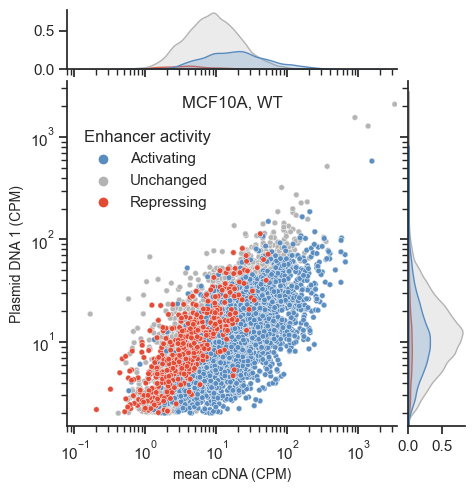

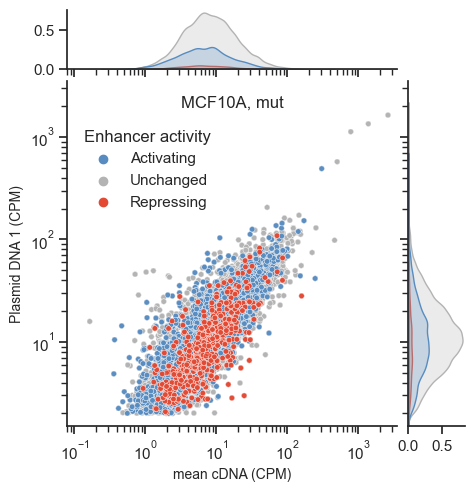

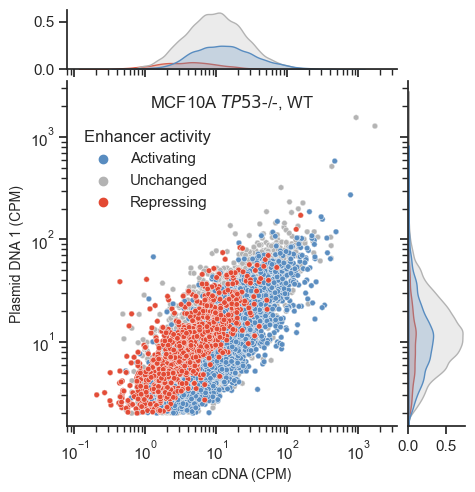

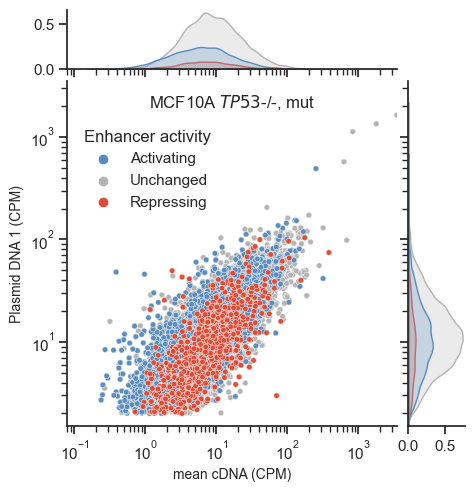

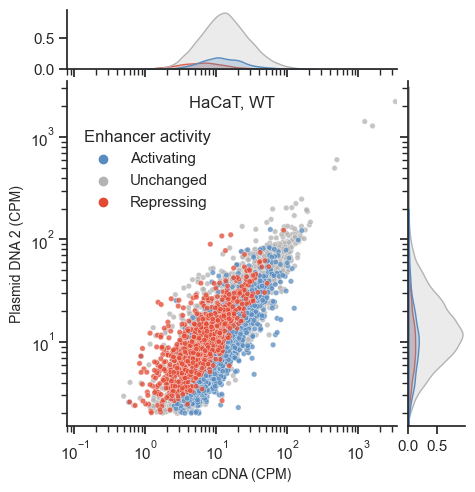

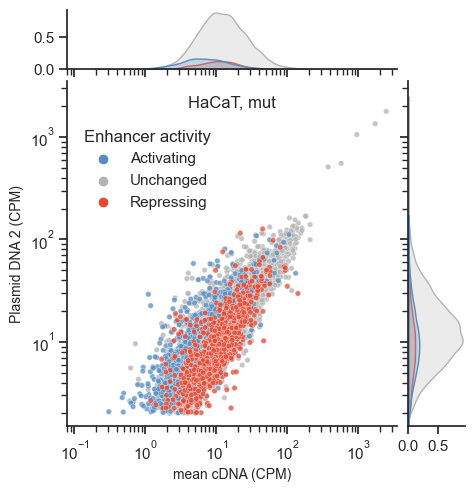

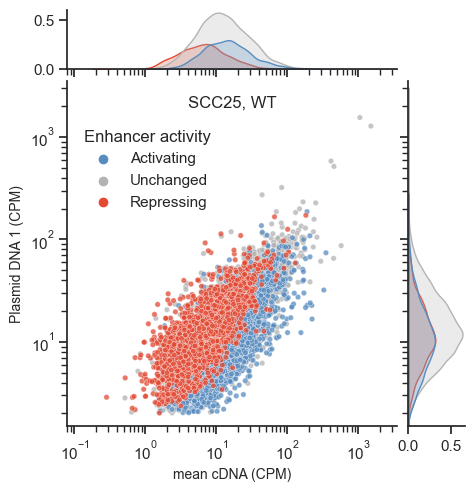

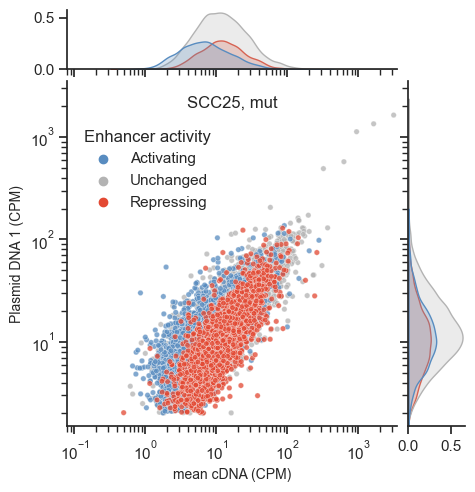

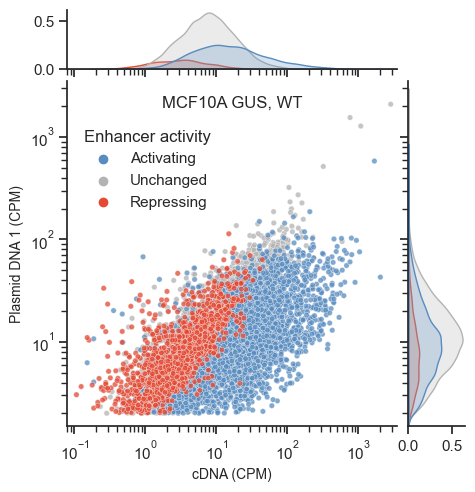

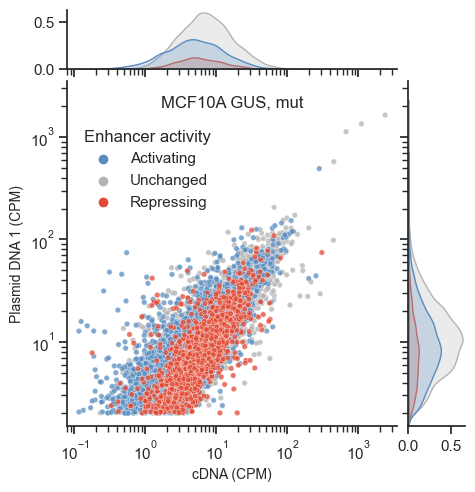

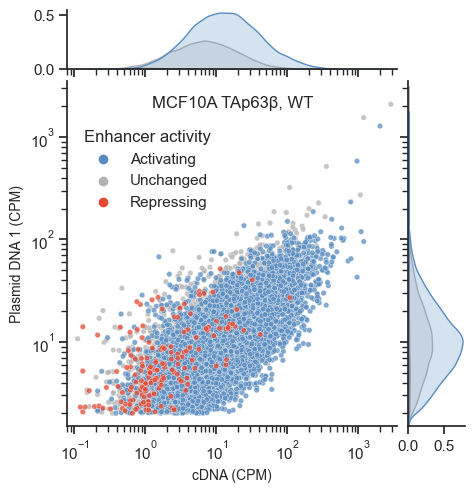

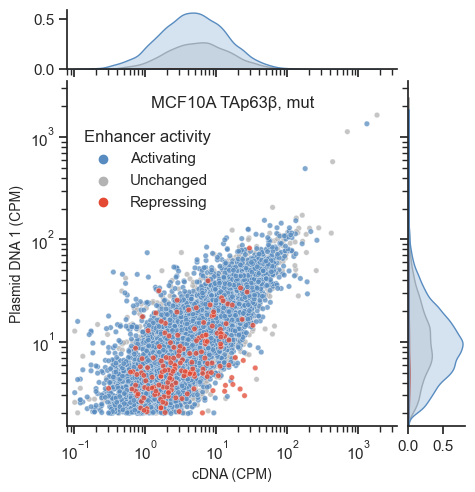

In [13]:
os.chdir(r'..\figures')
#CPM values, cDNA vs plasmid DNA, filtered, colored by activity
plot_jointplot(data = filt_mfc[filt_mfc.enhancer_variant == 'WT'], y_col='CPM_plasmid_1',x_col='mean_CPM_RNA', title = 'MCF10A, WT', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500), 
			   hue_title='Enhancer activity', xy_labels = ['mean cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3A.png')
plot_jointplot(data = filt_mfc[filt_mfc.enhancer_variant == 'mut'], y_col='CPM_plasmid_1',x_col='mean_CPM_RNA', title = 'MCF10A, mut', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500),  
			   hue_title='Enhancer activity', xy_labels = ['mean cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3E.png')

plot_jointplot(data = filt_pko[filt_pko.enhancer_variant == 'WT'], y_col='CPM_plasmid_1',x_col='mean_CPM_RNA', title = 'MCF10A $\it{TP53}$-/-, WT', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500), 
			   hue_title='Enhancer activity', xy_labels = ['mean cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3B.png')
plot_jointplot(data = filt_pko[filt_pko.enhancer_variant == 'mut'], y_col='CPM_plasmid_1',x_col='mean_CPM_RNA', title = 'MCF10A $\it{TP53}$-/-, mut', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500),  
			   hue_title='Enhancer activity', xy_labels = ['mean cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3F.png')

plot_jointplot(data = filt_hac[filt_hac.enhancer_variant == 'WT'], y_col='CPM_plasmid_2',x_col='mean_CPM_RNA', title = 'HaCaT, WT', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500), 
			   hue_title='Enhancer activity', xy_labels = ['mean cDNA','Plasmid DNA 2'], savefig = True, fig_name = 'S3C.png')
plot_jointplot(data = filt_hac[filt_hac.enhancer_variant == 'mut'], y_col='CPM_plasmid_2',x_col='mean_CPM_RNA', title = 'HaCaT, mut', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500),  
			   hue_title='Enhancer activity', xy_labels = ['mean cDNA','Plasmid DNA 2'], savefig = True, fig_name = 'S3G.png')

plot_jointplot(data = filt_scc[filt_scc.enhancer_variant == 'WT'], y_col='CPM_plasmid_1',x_col='mean_CPM_RNA', title = 'SCC25, WT', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500), 
			   hue_title='Enhancer activity', xy_labels = ['mean cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3D.png')
plot_jointplot(data = filt_scc[filt_scc.enhancer_variant == 'mut'], y_col='CPM_plasmid_1',x_col='mean_CPM_RNA', title = 'SCC25, mut', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500),  
			   hue_title='Enhancer activity', xy_labels = ['mean cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3H.png')

plot_jointplot(data = filt_gus[filt_gus.enhancer_variant == 'WT'], y_col='CPM_plasmid_1',x_col='CPM_RNA_MCF10AGus', title = 'MCF10A GUS, WT', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500), 
			   hue_title='Enhancer activity', xy_labels = ['cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3I.png')
plot_jointplot(data = filt_gus[filt_gus.enhancer_variant == 'mut'], y_col='CPM_plasmid_1',x_col='CPM_RNA_MCF10AGus', title = 'MCF10A GUS, mut', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500),  
			   hue_title='Enhancer activity', xy_labels = ['cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3K.png')

plot_jointplot(data = filt_tap63[filt_tap63.enhancer_variant == 'WT'], y_col='CPM_plasmid_1',x_col='CPM_RNA_MCF10ATAp63B', title = 'MCF10A TAp63β, WT', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500), 
			   hue_title='Enhancer activity', xy_labels = ['cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3J.png')
plot_jointplot(data = filt_tap63[filt_tap63.enhancer_variant == 'mut'], y_col='CPM_plasmid_1',x_col='CPM_RNA_MCF10ATAp63B', title = 'MCF10A TAp63β, mut', 
			   hue='activity', hue_ord=['Activating', 'Unchanged', 'Repressing'], pal = act_cols, xlims=(0.08,3500), ylims=(1.5,3500),  
			   hue_title='Enhancer activity', xy_labels = ['cDNA','Plasmid DNA 1'], savefig = True, fig_name = 'S3L.png')